<a href="https://colab.research.google.com/github/yuvi00001/COVID-19-Data-Analysis/blob/main/COVID_19_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib import gridspec

covid_19_india = pd.read_csv('/content/drive/MyDrive/Datasets/covid_19_india.csv')
statewise_testing = pd.read_csv('/content/drive/MyDrive/Datasets/StatewiseTestingDetails.csv')
vaccine_statewise = pd.read_csv('/content/drive/MyDrive/Datasets/covid_vaccine_statewise.csv')

Data Cleaning of the DataSet **covid_19_india**

In [2]:
columns = covid_19_india.columns

for col in columns:
  print(f'Type of the {col} column is {covid_19_india[col].dtype}')
 

Type of the Sno column is int64
Type of the Date column is object
Type of the Time column is object
Type of the State/UnionTerritory column is object
Type of the ConfirmedIndianNational column is object
Type of the ConfirmedForeignNational column is object
Type of the Cured column is int64
Type of the Deaths column is int64
Type of the Confirmed column is int64


In [3]:
covid_19_india.replace({'-':np.nan},inplace=True)
covid_19_india[['ConfirmedIndianNational','ConfirmedForeignNational']] = covid_19_india[['ConfirmedIndianNational','ConfirmedForeignNational']].apply(pd.to_numeric)
covid_19_india['Date'] = covid_19_india['Date'].apply(pd.to_datetime)
covid_19_india.drop(covid_19_india[covid_19_india['State/UnionTerritory']=='Unassigned'].index,axis='rows',inplace=True)
covid_19_india.drop(covid_19_india[covid_19_india['State/UnionTerritory']=='Cases being reassigned to states'].index,axis='rows',inplace=True)
covid_19_india.shape

(14267, 9)

Data Cleaning of the DataSet **statewise_testing**

In [4]:
statewise_testing.describe()
statewise_testing.replace({'NaN':np.nan,' ':np.nan},inplace=True)
statewise_testing['Negative'] = statewise_testing['Negative'].apply(pd.to_numeric)
statewise_testing['Date'] = statewise_testing['Date'].apply(pd.to_datetime)
statewise_testing.shape

(12676, 5)

Data Cleaning for DataSet **vaccine_statewise**

In [5]:
columns = vaccine_statewise.columns
for col in columns:
  print(f'Type of {col} column is {vaccine_statewise[col].dtype}')

Type of Updated On column is object
Type of State column is object
Type of Total Individuals Registered column is float64
Type of Total Sessions Conducted column is float64
Type of Total Sites  column is float64
Type of First Dose Administered column is float64
Type of Second Dose Administered column is float64
Type of Male(Individuals Vaccinated) column is float64
Type of Female(Individuals Vaccinated) column is float64
Type of Transgender(Individuals Vaccinated) column is float64
Type of Total Covaxin Administered column is float64
Type of Total CoviShield Administered column is float64
Type of Total Individuals Vaccinated column is float64
Type of Total Doses Administered column is int64
Type of Unnamed: 14 column is float64
Type of Unnamed: 15 column is float64
Type of Unnamed: 16 column is float64


In [6]:
vaccine_statewise.drop(columns=['Unnamed: 14','Unnamed: 15','Unnamed: 16'],inplace=True)
vaccine_statewise['Updated On'] = vaccine_statewise['Updated On'].apply(pd.to_datetime)
vaccine_statewise.shape

(3774, 14)

**Top 10 states with most death**

2021-04-28

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


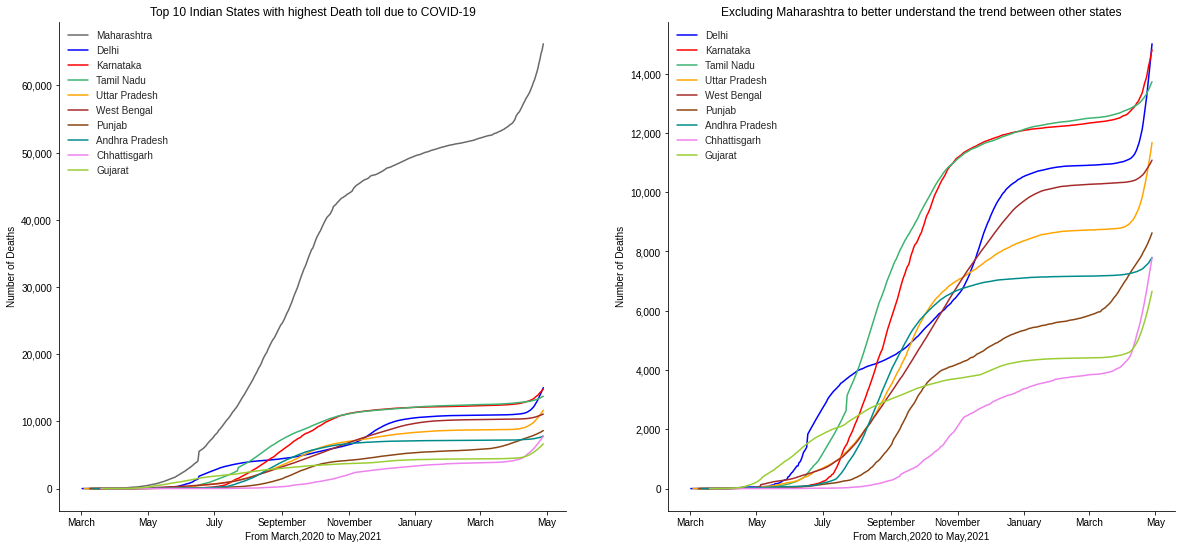

In [7]:
#covid_19_india[covid_19_india['State/UnionTerritory']=='Cases being reassigned to states']
states = covid_19_india['State/UnionTerritory'].unique()
data_on_last_recorded_date = covid_19_india[covid_19_india['Date']=='2021-04-28']

data_on_last_recorded_date.sort_values(by='Deaths',ascending=False,inplace=True)
data_on_last_recorded_date

top10states_d = list(data_on_last_recorded_date['State/UnionTerritory'][:10])
top10states_deathdata = covid_19_india[covid_19_india['State/UnionTerritory'].isin(top10states_d)]
top10states_deathdata = top10states_deathdata[['Date','State/UnionTerritory','Deaths']]
top10states_deathdata.set_index('Date',drop=True,inplace=True)
state_data_name = ['Maharashtra_data',
 'Delhi_data',
 'Karnataka_data',
 'Tamil_Nadu_data',
 'Uttar_Pradesh_data',
 'West_Bengal_data',
 'Punjab_data',
 'Andhra_Pradesh_data',
 'Chhattisgarh_data',
 'Gujarat_data']

#creating statewise dataset for their death data
def func(name,data):
  dataset = data[data['State/UnionTerritory']==name]
  return dataset
  
 
Maharashtra_data = func('Maharashtra',top10states_deathdata)
Delhi_data = func('Delhi',top10states_deathdata)
Karnataka_data = func('Karnataka',top10states_deathdata)
Tamil_Nadu_data = func('Tamil Nadu',top10states_deathdata)
Uttar_Pradesh_data = func('Uttar Pradesh',top10states_deathdata)
West_Bengal_data = func('West Bengal',top10states_deathdata)
Punjab_data = func('Punjab',top10states_deathdata)
Andhra_Pradesh_data = func('Andhra Pradesh',top10states_deathdata)
Chhattisgarh_data = func('Chhattisgarh',top10states_deathdata)
Gujarat_data = func('Gujarat',top10states_deathdata)

figure, (ax,ax1) = plt.subplots(1,2,figsize=(20,9))


#plot 1
plt.style.use('seaborn-darkgrid')
ax.plot(Maharashtra_data['Deaths'],label='Maharashtra',color='dimgray')
ax.plot(Delhi_data['Deaths'],label='Delhi',color='blue')
ax.plot(Karnataka_data['Deaths'],label='Karnataka',color='red')
ax.plot(Tamil_Nadu_data['Deaths'],label='Tamil Nadu',color='mediumseagreen')
ax.plot(Uttar_Pradesh_data['Deaths'],label='Uttar Pradesh',color='orange')
ax.plot(West_Bengal_data['Deaths'],label='West Bengal',color='brown')
ax.plot(Punjab_data['Deaths'],label='Punjab',color='saddlebrown')
ax.plot(Andhra_Pradesh_data['Deaths'],label='Andhra Pradesh',color='darkcyan')
ax.plot(Chhattisgarh_data['Deaths'],label='Chhattisgarh',color='violet')
ax.plot(Gujarat_data['Deaths'],label='Gujarat',color='yellowgreen')
ax.legend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
ax.set_ylabel('Number of Deaths')
ax.set_xlabel('From March,2020 to May,2021')
ax.set_title('Top 10 Indian States with highest Death toll due to COVID-19')
ax.set_yticklabels(['','0','10,000','20,000','30,000','40,000','50,000','60,000'])

#plot 2
ax1.plot(Delhi_data['Deaths'],label='Delhi',color='blue')
ax1.plot(Karnataka_data['Deaths'],label='Karnataka',color='red')
ax1.plot(Tamil_Nadu_data['Deaths'],label='Tamil Nadu',color='mediumseagreen')
ax1.plot(Uttar_Pradesh_data['Deaths'],label='Uttar Pradesh',color='orange')
ax1.plot(West_Bengal_data['Deaths'],label='West Bengal',color='brown')
ax1.plot(Punjab_data['Deaths'],label='Punjab',color='saddlebrown')
ax1.plot(Andhra_Pradesh_data['Deaths'],label='Andhra Pradesh',color='darkcyan')
ax1.plot(Chhattisgarh_data['Deaths'],label='Chhattisgarh',color='violet')
ax1.plot(Gujarat_data['Deaths'],label='Gujarat',color='yellowgreen')
ax1.legend(frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
ax1.set_xlabel('From March,2020 to May,2021')
ax1.set_ylabel('Number of Deaths')
ax1.set_title('Excluding Maharashtra to better understand the trend between other states')
ax1.set_yticklabels(['','0','2,000','4,000','6,000','8,000','10,000','12,000','14,000'])
plt.savefig('death toll per states.png')
#files.download('death toll per states.png')

In [8]:
number_of_death_statewise = top10states_deathdata[top10states_deathdata.index=='2021-04-28']
number_of_death_statewise.sort_values('Deaths',ascending=False,inplace=True)
number_of_death_statewise.reset_index(drop=True,inplace=True)
number_of_death_statewise.index = np.arange(1,11)
number_of_death_statewise.T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,1,2,3,4,5,6,7,8,9,10
State/UnionTerritory,Maharashtra,Delhi,Karnataka,Tamil Nadu,Uttar Pradesh,West Bengal,Punjab,Andhra Pradesh,Chhattisgarh,Gujarat
Deaths,66179,15009,14807,13728,11678,11082,8630,7800,7782,6656


Calculating **Infection Fatality Ratio | Case fatality ratio** 

In [9]:


data_on_last_recorded_date.set_index('Date',drop=True,inplace=True)
data_on_last_recorded_date['Infection Fatality Ratio(%)'] = (data_on_last_recorded_date['Deaths']/data_on_last_recorded_date['Confirmed'])*100
data_on_last_recorded_date['Case Fatality Ratio(%)'] = (data_on_last_recorded_date['Deaths']/(data_on_last_recorded_date['Deaths']+data_on_last_recorded_date['Cured']))*100
data_on_last_recorded_date['Recovery Rate(%)'] = (data_on_last_recorded_date['Cured']/data_on_last_recorded_date['Confirmed'])*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

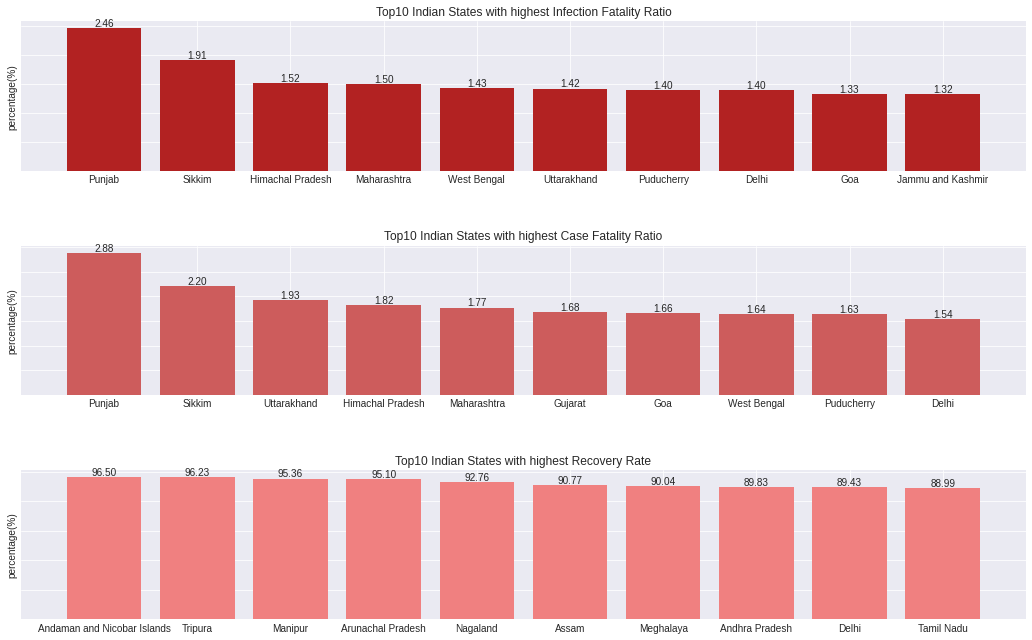

In [10]:
IFR_data = data_on_last_recorded_date[['State/UnionTerritory','Infection Fatality Ratio(%)']]
IFR_data.sort_values('Infection Fatality Ratio(%)',inplace=True,ascending=False)
IFR_data = IFR_data.iloc[:10,]
#IFR_data.reset_index(drop=True,inplace=True)

CFR_data = data_on_last_recorded_date[['State/UnionTerritory','Case Fatality Ratio(%)']]
CFR_data.sort_values('Case Fatality Ratio(%)',inplace=True,ascending=False)
CFR_data = CFR_data.iloc[:10,]

recovery_data = data_on_last_recorded_date[['State/UnionTerritory','Recovery Rate(%)']]
recovery_data.sort_values('Recovery Rate(%)',inplace=True,ascending=False)
recovery_data = recovery_data.iloc[:10,]
pos = np.arange(10)

plt.figure(figsize=(18,11))
gs = gridspec.GridSpec(3,1)
gs.update(wspace = 0.5, hspace = 0.5)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[1,0])
ax3 = plt.subplot(gs[2,0])

bars = ax1.bar(pos,IFR_data['Infection Fatality Ratio(%)'],color='firebrick')
plt.sca(ax1)
plt.xticks(pos,list(IFR_data['State/UnionTerritory']))
ax1.set_title('Top10 Indian States with highest Infection Fatality Ratio')
ax1.set_ylabel('percentage(%)')
for rect in bars:
  height = rect.get_height()
  ax1.text(rect.get_x() + rect.get_width()/2.0, height,'%.2f'%(float(height)), ha='center', va='bottom')
for yticks in ax1.axes.get_yticklabels():
  yticks.set_visible(False)


bars = ax2.bar(pos,CFR_data['Case Fatality Ratio(%)'],color='indianred')
plt.sca(ax2)
plt.xticks(pos,list(CFR_data['State/UnionTerritory']))
ax2.set_title('Top10 Indian States with highest Case Fatality Ratio')
ax2.set_ylabel('percentage(%)')
for rect in bars:
  height = rect.get_height()
  ax2.text(rect.get_x() + rect.get_width()/2.0, height,'%.2f'%(float(height)), ha='center', va='bottom')
for yticks in ax2.axes.get_yticklabels():
  yticks.set_visible(False)


bars = ax3.bar(pos,recovery_data['Recovery Rate(%)'],color='lightcoral')
plt.sca(ax3)
plt.xticks(pos,list(recovery_data['State/UnionTerritory']))
ax3.set_title('Top10 Indian States with highest Recovery Rate')
ax3.set_ylabel('percentage(%)')
for rect in bars:
  height = rect.get_height()
  ax3.text(rect.get_x() + rect.get_width()/2.0, height,'%.2f'%(float(height)), ha='center', va='bottom')
for yticks in ax3.axes.get_yticklabels():
  yticks.set_visible(False)

plt.savefig('statewise barplot.png')
files.download('statewise barplot.png')

In [11]:
IFR_data['Infection Fatality Ratio(%)']

Date
2021-04-28    2.456716
2021-04-28    1.912200
2021-04-28    1.518336
2021-04-28    1.500629
2021-04-28    1.427458
2021-04-28    1.420381
2021-04-28    1.400621
2021-04-28    1.400008
2021-04-28    1.325878
2021-04-28    1.323064
Name: Infection Fatality Ratio(%), dtype: float64


**Covaxine vs CoviShield**

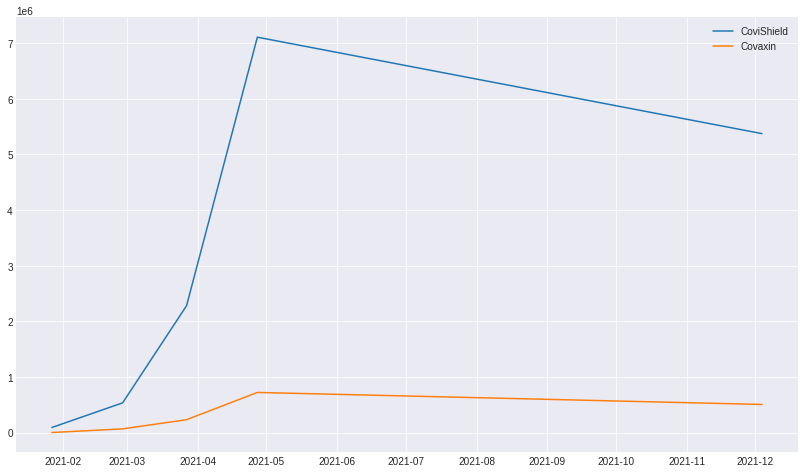

In [12]:
df = vaccine_statewise[['Updated On','Total Covaxin Administered','Total CoviShield Administered']]
#df['Updated On'] = pd.to_datetime(df['Updated On'])

df = df[df['Updated On'].isin(['2021-01-27','2021-02-27','2021-03-27','2021-04-27','2021-05-27','2021-06-27','2021-07-27','2021-08-27','2021-09-27','2021-10-27','2021-11-27','2021-12-04'])]
df.set_index(['Updated On'],drop = True,inplace = True)
df.sort_index(inplace=True)
df = df.groupby(level=0).agg({'Total Covaxin Administered': 'mean','Total CoviShield Administered': 'mean'})

plt.figure(figsize=(14,8))
plt.plot(df['Total CoviShield Administered'],)
plt.plot(df['Total Covaxin Administered'])
plt.legend(['CoviShield','Covaxin'])
plt.show()